In [ ]:
import pandas as pd
import numpy as np
from google.colab import auth
import gspread
from google.auth import default

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#authenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('ecommerce').sheet1

# get_all_values gives a list of rows
rows = worksheet.get_all_values()

# convert to a DataFrame Pandas
df = pd.DataFrame(rows)

# makes first row as header
df.columns = df.iloc[0]
df = df.iloc[1:]

In [ ]:
df.head()

,Order Id,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
1,AU-2015-172,2022-01-01,2022-01-09,8,First Class,Auto & Accessories,Car Media Players,140.00,4,0.02,...,4.90,Critical,HY-00172,Mathis Mccarthy,Consumer,Zapopan,Jalisco,Mexico,North,Jan
2,AU-2015-1473,2022-01-01,2022-01-08,7,First Class,Auto & Accessories,Bike Tyres,72.00,5,0.02,...,1.40,Medium,NI-001473,Blanchard Vittorini,Consumer,Seoul,Seoul,South Korea,North Asia,Jan
3,AU-2015-1650,2022-01-01,2022-01-11,10,First Class,Auto & Accessories,Car Body Covers,117.00,5,0.02,...,2.50,High,UM-001650,Hood Mitchum,Home Office,Roodepoort,Gauteng,South Africa,Africa,Jan
4,AU-2015-1999,2022-01-01,2022-01-09,8,First Class,Auto & Accessories,Car Media Players,140.00,4,0.02,...,4.90,High,CK-001999,Nicholson Murdock,Consumer,Istanbul,Istanbul,Turkey,EMEA,Jan
5,AU-2015-2155,2022-01-01,2022-01-11,10,First Class,Auto & Accessories,Car & Bike Care,118.00,3,0.02,...,3.10,High,LD-002155,Medina Fjeld,Home Office,Santa Catarina,Nuevo León,Mexico,North,Jan


In [ ]:
# Changing Data Types
# Datetime
df['Order Date'] = df['Order Date'].astype('datetime64[ns]')
df['Ship Date'] = df['Ship Date'].astype('datetime64[ns]')

# Numeric
df['Aging'] =  df['Aging'].astype('float')
df['Sales'] =  df['Sales'].astype('float')
df['Quantity'] =  df['Quantity'].astype('int')
df['Discount'] =  df['Discount'].astype('float')
df['Profit'] =  df['Profit'].astype('float')
df['Shipping Cost'] =  df['Shipping Cost'].astype('float')

In [ ]:
df.dtypes

0
Order Id                    object
Order Date          datetime64[ns]
Ship Date           datetime64[ns]
Aging                      float64
Ship Mode                   object
Product Category            object
Product                     object
Sales                      float64
Quantity                     int64
Discount                   float64
Profit                     float64
Shipping Cost              float64
Order Priority              object
Customer ID                 object
Customer Name               object
Segment                     object
City                        object
State                       object
Country                     object
Region                      object
Months                      object
dtype: object

In [ ]:
#checking nulls
df.isna().sum()

0
Order Id            0
Order Date          0
Ship Date           0
Aging               0
Ship Mode           0
Product Category    0
Product             0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
Customer ID         0
Customer Name       0
Segment             0
City                0
State               0
Country             0
Region              0
Months              0
dtype: int64

# Data Visualization

In [ ]:
#figure size in inches
plt.rcParams['figure.figsize'] = 15, 7

# Line Chart

In [ ]:
data =  df.loc[df['Order Date'].dt.year == 2022].groupby('Order Date').agg({'Order Id': 'count'})

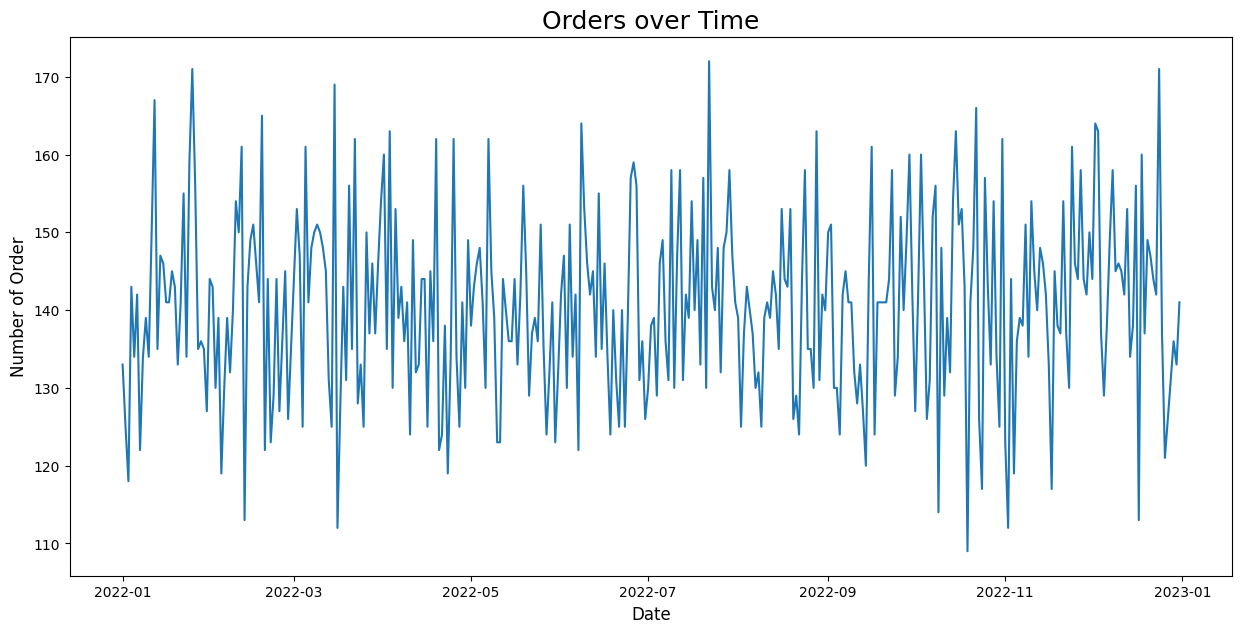

In [ ]:
#rotating x-axis values
#plt.xticks(rotation = 'vertical')

#line plot
sns.lineplot(data = data.reset_index(), x='Order Date', y='Order Id')

#labeling
plt.title(f"Orders over Time", fontsize=18) #title
plt.xlabel("Date", fontsize=12) #x-axis label
plt.ylabel("Number of Order", fontsize=12) #y-axis label

#showing plot
plt.show()

In [ ]:
# Filter to 2022 Orders only, then pick Order Date & Order Id Column
data = df.loc[df['Order Date'].dt.year == 2022, ['Order Date', 'Order Id']]

# Change dates -> year-month format, then change the dtypes back to datetime
data['Order Date'] = data['Order Date'].map(lambda x: x.strftime('%Y-%m')).astype('datetime64[ns]')

#grouping per order date, then count
data = data.groupby('Order Date').agg({'Order Id': 'count'})

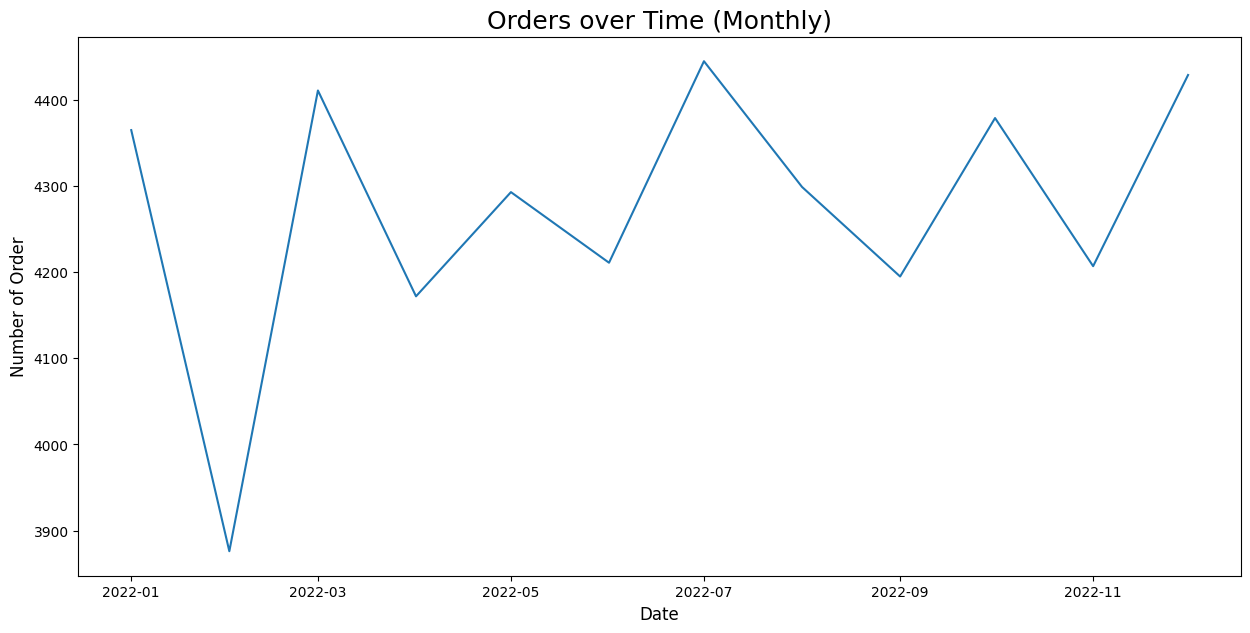

In [ ]:
#line plot
sns.lineplot(data = data.reset_index(), x='Order Date', y='Order Id')

#labeling
plt.title(f"Orders over Time (Monthly)", fontsize=18) #title
plt.xlabel("Date", fontsize=12) #x-axis label
plt.ylabel("Number of Order", fontsize=12) #y-axis label

#showing plot
plt.show()

# Pie Chart

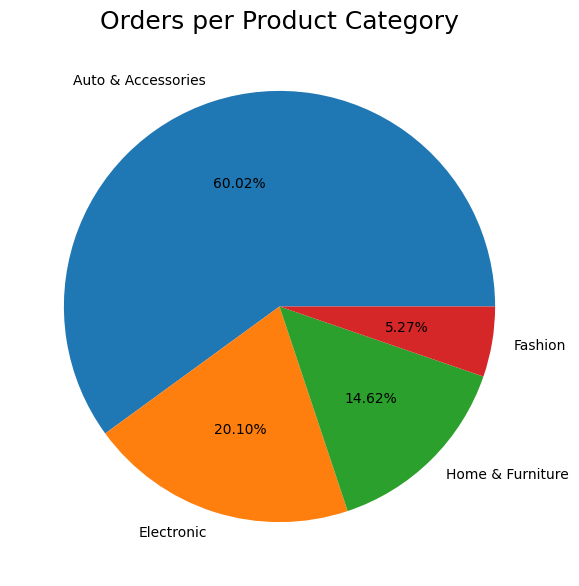

In [ ]:
data =  df['Product Category'].value_counts() #banyak datanya
keys = df['Product Category'].unique() #label

#plotting data on chart
plt.pie(data, labels=keys, autopct='%.2f%%')
plt.title('Orders per Product Category', fontsize=18)

#displaying chart
plt.show()

# Bar Chart

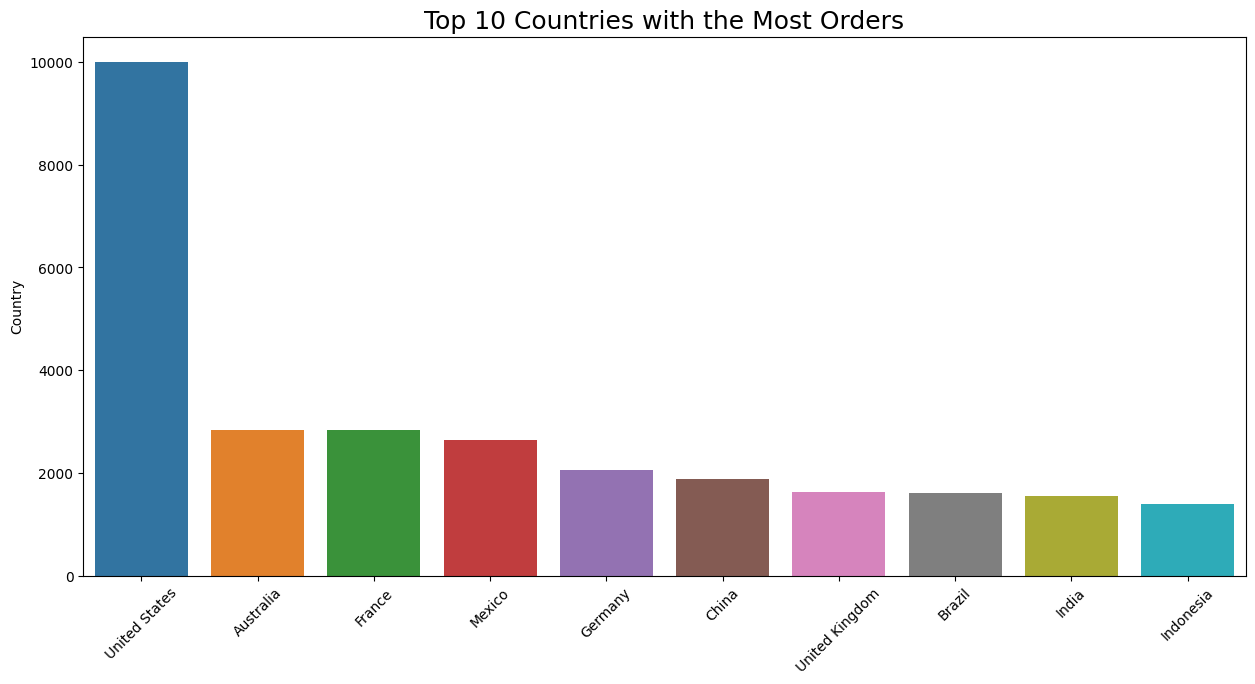

In [ ]:
y = df["Country"].value_counts().head(10)
x = df["Country"].value_counts().head(10).index

#Draw Bar Chart
sns.barplot(x=x,y=y)

plt.xticks(rotation = 45)

plt.title('Top 10 Countries with the Most Orders', fontsize=18)
plt.show()

In [ ]:
df["Country"].value_counts().head(10).index

Index(['United States', 'Australia', 'France', 'Mexico', 'Germany', 'China',
       'United Kingdom', 'Brazil', 'India', 'Indonesia'],
      dtype='object')